In [2]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [32]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset[i:(i+look_back),0:]
		dataX.append(a)
		dataY.append(dataset[i + look_back,0])
	return numpy.array(dataX), numpy.array(dataY)

In [53]:
import pickle
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
# Getting back the objects:
with open('prod2_fullset_test_train.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    dataset, train, test = pickle.load(f)
    #print(test.shape)

with open('prod2_test_train_autoencoder_window4_size20.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    train_autoenc, test_autoenc = pickle.load(f)
    #print(train_autoenc.shape)
    print(train_autoenc.shape, test_autoenc.shape)

(53, 21) (24, 21)


In [52]:
#-------------------------------------------------------------
# AQUI TEM QUE FAZER OS SCALINGS PRA NA HORA DE PLOTAR VOLTAR PRA ESCALA NORMAL
#-------------------------------------------------------------
look_back = 1


trainX_autoenc, trainY_autoenc = create_dataset(train_autoenc, look_back)
testX_autoenc, testY_autoenc = create_dataset(test_autoenc, look_back)

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX_autoenc.shape)

(52, 1, 21)


In [45]:

# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
#testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(15, input_shape=(look_back, 22)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = [EarlyStopping(monitor='loss', patience=150, mode='auto', min_delta=0.0005)]
model.fit(trainX, trainY, epochs=500, batch_size=10, verbose=2, callbacks=early_stop)

Epoch 1/500
 - 1s - loss: 0.3191
Epoch 2/500
 - 0s - loss: 0.2947
Epoch 3/500
 - 0s - loss: 0.2751
Epoch 4/500
 - 0s - loss: 0.2540
Epoch 5/500
 - 0s - loss: 0.2405
Epoch 6/500
 - 0s - loss: 0.2274
Epoch 7/500
 - 0s - loss: 0.2170
Epoch 8/500
 - 0s - loss: 0.2087
Epoch 9/500
 - 0s - loss: 0.2028
Epoch 10/500
 - 0s - loss: 0.1971
Epoch 11/500
 - 0s - loss: 0.1931
Epoch 12/500
 - 0s - loss: 0.1896
Epoch 13/500
 - 0s - loss: 0.1867
Epoch 14/500
 - 0s - loss: 0.1852
Epoch 15/500
 - 0s - loss: 0.1826
Epoch 16/500
 - 0s - loss: 0.1812
Epoch 17/500
 - 0s - loss: 0.1802
Epoch 18/500
 - 0s - loss: 0.1775
Epoch 19/500
 - 0s - loss: 0.1759
Epoch 20/500
 - 0s - loss: 0.1750
Epoch 21/500
 - 0s - loss: 0.1737
Epoch 22/500
 - 0s - loss: 0.1726
Epoch 23/500
 - 0s - loss: 0.1714
Epoch 24/500
 - 0s - loss: 0.1705
Epoch 25/500
 - 0s - loss: 0.1688
Epoch 26/500
 - 0s - loss: 0.1675
Epoch 27/500
 - 0s - loss: 0.1665
Epoch 28/500
 - 0s - loss: 0.1639
Epoch 29/500
 - 0s - loss: 0.1631
Epoch 30/500
 - 0s - lo

 - 0s - loss: 0.1134
Epoch 239/500
 - 0s - loss: 0.1096
Epoch 240/500
 - 0s - loss: 0.1065
Epoch 241/500
 - 0s - loss: 0.1071
Epoch 242/500
 - 0s - loss: 0.1093
Epoch 243/500
 - 0s - loss: 0.1068
Epoch 244/500
 - 0s - loss: 0.1073
Epoch 245/500
 - 0s - loss: 0.1067
Epoch 246/500
 - 0s - loss: 0.1066
Epoch 247/500
 - 0s - loss: 0.1068
Epoch 248/500
 - 0s - loss: 0.1062
Epoch 249/500
 - 0s - loss: 0.1056
Epoch 250/500
 - 0s - loss: 0.1057
Epoch 251/500
 - 0s - loss: 0.1057
Epoch 252/500
 - 0s - loss: 0.1068
Epoch 253/500
 - 0s - loss: 0.1058
Epoch 254/500
 - 0s - loss: 0.1060
Epoch 255/500
 - 0s - loss: 0.1061
Epoch 256/500
 - 0s - loss: 0.1059
Epoch 257/500
 - 0s - loss: 0.1050
Epoch 258/500
 - 0s - loss: 0.1050
Epoch 259/500
 - 0s - loss: 0.1055
Epoch 260/500
 - 0s - loss: 0.1062
Epoch 261/500
 - 0s - loss: 0.1048
Epoch 262/500
 - 0s - loss: 0.1051
Epoch 263/500
 - 0s - loss: 0.1054
Epoch 264/500
 - 0s - loss: 0.1053
Epoch 265/500
 - 0s - loss: 0.1057
Epoch 266/500
 - 0s - loss: 0.1042

Epoch 473/500
 - 0s - loss: 0.0822
Epoch 474/500
 - 0s - loss: 0.0838
Epoch 475/500
 - 0s - loss: 0.0837
Epoch 476/500
 - 0s - loss: 0.0820
Epoch 477/500
 - 0s - loss: 0.0827
Epoch 478/500
 - 0s - loss: 0.0809
Epoch 479/500
 - 0s - loss: 0.0828
Epoch 480/500
 - 0s - loss: 0.0816
Epoch 481/500
 - 0s - loss: 0.0811
Epoch 482/500
 - 0s - loss: 0.0814
Epoch 483/500
 - 0s - loss: 0.0798
Epoch 484/500
 - 0s - loss: 0.0800
Epoch 485/500
 - 0s - loss: 0.0812
Epoch 486/500
 - 0s - loss: 0.0817
Epoch 487/500
 - 0s - loss: 0.0798
Epoch 488/500
 - 0s - loss: 0.0799
Epoch 489/500
 - 0s - loss: 0.0818
Epoch 490/500
 - 0s - loss: 0.0794
Epoch 491/500
 - 0s - loss: 0.0788
Epoch 492/500
 - 0s - loss: 0.0793
Epoch 493/500
 - 0s - loss: 0.0818
Epoch 494/500
 - 0s - loss: 0.0818
Epoch 495/500
 - 0s - loss: 0.0793
Epoch 496/500
 - 0s - loss: 0.0810
Epoch 497/500
 - 0s - loss: 0.0799
Epoch 498/500
 - 0s - loss: 0.0791
Epoch 499/500
 - 0s - loss: 0.0781
Epoch 500/500
 - 0s - loss: 0.0787


In [46]:

# make predictions
trainPredict = model.predict(trainX, batch_size=10)
testPredict = model.predict(testX, batch_size=10)
# invert predictions
#aux = train
#for i in range(1,len(aux)-1):
#    aux[i][0] = trainPredict[i][0]
    
#trainPredict = scaler2.inverse_transform(trainPredict)
#trainY = scaler2.inverse_transform(trainY)
#testPredict = scaler2.inverse_transform(testPredict)
#testY = scaler2.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.28 RMSE
Test Score: 0.64 RMSE


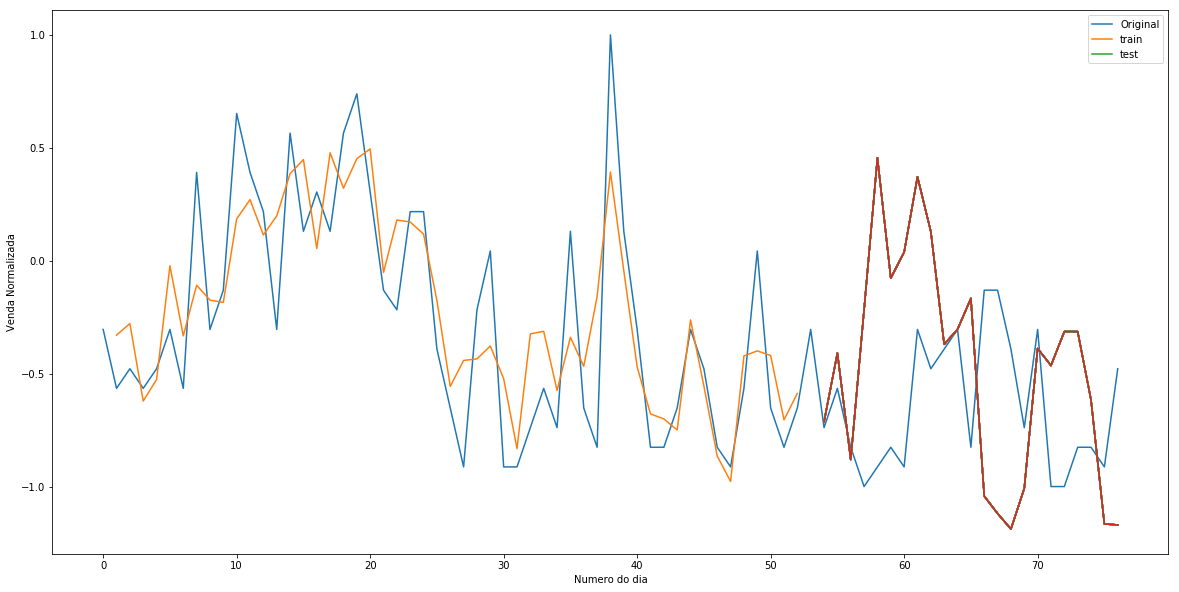

In [51]:
trainPredictPlot = numpy.empty_like(dataset[:,0])
trainPredictPlot[:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict[:,0]
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back)+1:len(dataset[:,0]), :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(dataset[:,0])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original','train','test'])
plt.xlabel('Numero do dia')
plt.ylabel('Venda Normalizada')
plt.savefig('./Results/LSTM_original_features.png')


In [42]:
# TRAINING WITH AUGMENTED FEATURES
model = Sequential()
model.add(LSTM(6, input_shape=(look_back, 21)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = [EarlyStopping(monitor='loss', patience=150, mode='auto', min_delta=0.0005)]
model.fit(trainX_autoenc, trainY_autoenc, epochs=500, batch_size=10, verbose=2, callbacks=early_stop)

Epoch 1/500
 - 1s - loss: 0.3243
Epoch 2/500
 - 0s - loss: 0.3102
Epoch 3/500
 - 0s - loss: 0.2964
Epoch 4/500
 - 0s - loss: 0.2835
Epoch 5/500
 - 0s - loss: 0.2716
Epoch 6/500
 - 0s - loss: 0.2630
Epoch 7/500
 - 0s - loss: 0.2521
Epoch 8/500
 - 0s - loss: 0.2447
Epoch 9/500
 - 0s - loss: 0.2366
Epoch 10/500
 - 0s - loss: 0.2282
Epoch 11/500
 - 0s - loss: 0.2209
Epoch 12/500
 - 0s - loss: 0.2144
Epoch 13/500
 - 0s - loss: 0.2076
Epoch 14/500
 - 0s - loss: 0.2028
Epoch 15/500
 - 0s - loss: 0.1976
Epoch 16/500
 - 0s - loss: 0.1927
Epoch 17/500
 - 0s - loss: 0.1884
Epoch 18/500
 - 0s - loss: 0.1846
Epoch 19/500
 - 0s - loss: 0.1809
Epoch 20/500
 - 0s - loss: 0.1780
Epoch 21/500
 - 0s - loss: 0.1742
Epoch 22/500
 - 0s - loss: 0.1711
Epoch 23/500
 - 0s - loss: 0.1686
Epoch 24/500
 - 0s - loss: 0.1659
Epoch 25/500
 - 0s - loss: 0.1636
Epoch 26/500
 - 0s - loss: 0.1614
Epoch 27/500
 - 0s - loss: 0.1594
Epoch 28/500
 - 0s - loss: 0.1573
Epoch 29/500
 - 0s - loss: 0.1551
Epoch 30/500
 - 0s - lo

 - 0s - loss: 0.0292
Epoch 239/500
 - 0s - loss: 0.0291
Epoch 240/500
 - 0s - loss: 0.0285
Epoch 241/500
 - 0s - loss: 0.0284
Epoch 242/500
 - 0s - loss: 0.0282
Epoch 243/500
 - 0s - loss: 0.0275
Epoch 244/500
 - 0s - loss: 0.0272
Epoch 245/500
 - 0s - loss: 0.0271
Epoch 246/500
 - 0s - loss: 0.0267
Epoch 247/500
 - 0s - loss: 0.0265
Epoch 248/500
 - 0s - loss: 0.0265
Epoch 249/500
 - 0s - loss: 0.0264
Epoch 250/500
 - 0s - loss: 0.0261
Epoch 251/500
 - 0s - loss: 0.0262
Epoch 252/500
 - 0s - loss: 0.0263
Epoch 253/500
 - 0s - loss: 0.0260
Epoch 254/500
 - 0s - loss: 0.0255
Epoch 255/500
 - 0s - loss: 0.0250
Epoch 256/500
 - 0s - loss: 0.0245
Epoch 257/500
 - 0s - loss: 0.0241
Epoch 258/500
 - 0s - loss: 0.0239
Epoch 259/500
 - 0s - loss: 0.0238
Epoch 260/500
 - 0s - loss: 0.0237
Epoch 261/500
 - 0s - loss: 0.0237
Epoch 262/500
 - 0s - loss: 0.0236
Epoch 263/500
 - 0s - loss: 0.0230
Epoch 264/500
 - 0s - loss: 0.0226
Epoch 265/500
 - 0s - loss: 0.0226
Epoch 266/500
 - 0s - loss: 0.0222

Epoch 473/500
 - 0s - loss: 0.0041
Epoch 474/500
 - 0s - loss: 0.0042
Epoch 475/500
 - 0s - loss: 0.0042
Epoch 476/500
 - 0s - loss: 0.0042
Epoch 477/500
 - 0s - loss: 0.0039
Epoch 478/500
 - 0s - loss: 0.0040
Epoch 479/500
 - 0s - loss: 0.0038
Epoch 480/500
 - 0s - loss: 0.0039
Epoch 481/500
 - 0s - loss: 0.0038
Epoch 482/500
 - 0s - loss: 0.0037
Epoch 483/500
 - 0s - loss: 0.0039
Epoch 484/500
 - 0s - loss: 0.0038
Epoch 485/500
 - 0s - loss: 0.0037
Epoch 486/500
 - 0s - loss: 0.0038
Epoch 487/500
 - 0s - loss: 0.0037
Epoch 488/500
 - 0s - loss: 0.0037
Epoch 489/500
 - 0s - loss: 0.0036
Epoch 490/500
 - 0s - loss: 0.0036
Epoch 491/500
 - 0s - loss: 0.0036
Epoch 492/500
 - 0s - loss: 0.0035
Epoch 493/500
 - 0s - loss: 0.0036
Epoch 494/500
 - 0s - loss: 0.0036
Epoch 495/500
 - 0s - loss: 0.0038
Epoch 496/500
 - 0s - loss: 0.0037
Epoch 497/500
 - 0s - loss: 0.0039
Epoch 498/500
 - 0s - loss: 0.0036
Epoch 499/500
 - 0s - loss: 0.0035
Epoch 500/500
 - 0s - loss: 0.0035


In [43]:

# make predictions
trainPredict_autoenc = model.predict(trainX_autoenc, batch_size=10)
testPredict_autoenc = model.predict(testX_autoenc, batch_size=10)
# invert predictions
#aux = train
#for i in range(1,len(aux)-1):
#    aux[i][0] = trainPredict[i][0]
    
#trainPredict = scaler2.inverse_transform(trainPredict)
#trainY = scaler2.inverse_transform(trainY)
#testPredict = scaler2.inverse_transform(testPredict)
#testY = scaler2.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_autoenc, trainPredict_autoenc[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY_autoenc, testPredict_autoenc[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.06 RMSE
Test Score: 0.37 RMSE


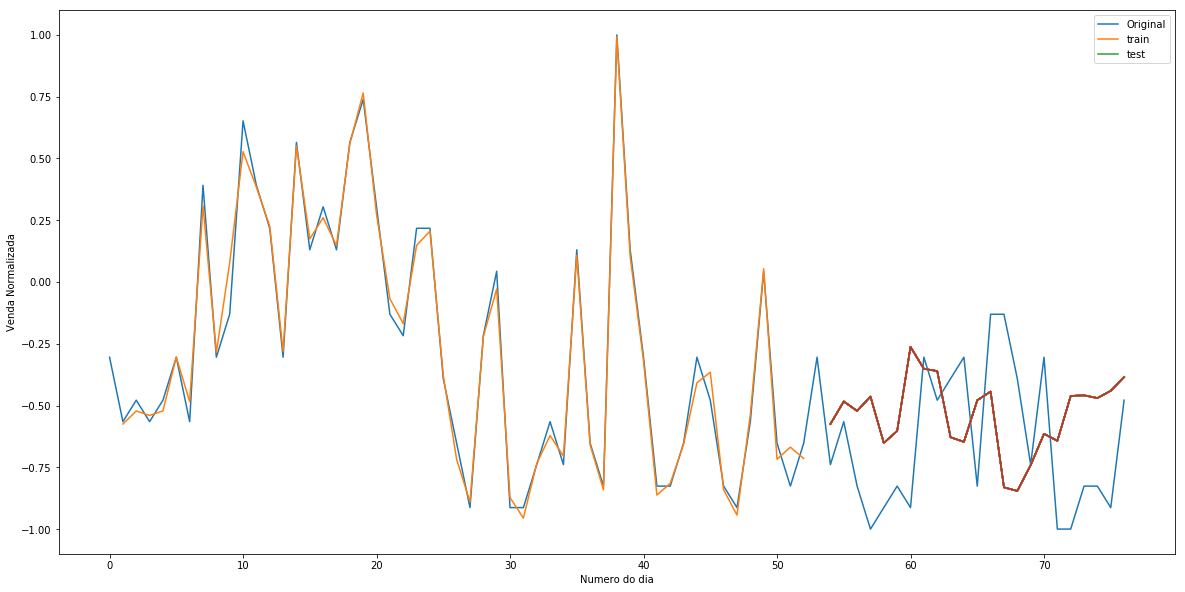

In [50]:
trainPredictPlot = numpy.empty_like(dataset[:,0])
trainPredictPlot[:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict_autoenc)+look_back] = trainPredict_autoenc[:,0]
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict_autoenc)+(look_back)+1:len(dataset[:,0]), :] = testPredict_autoenc
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(dataset[:,0])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original','train','test'])
plt.xlabel('Numero do dia')
plt.ylabel('Venda Normalizada')
plt.savefig('./Results/LSTM_Autoencoder_size20.png')